In [1]:
library(tidyverse)
library(glue)

Warning message:
“package ‘tidyverse’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
Warning message:
“package ‘lubridate’ was built under R version 4.2.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package 

In [10]:
fig_dir <- "/lustre/groups/ml01/workspace/ot_perturbation/figures/sciplex/data"

In [11]:
df_ood <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/reconstruction/negativity_allocated.csv") 

New names:
• `` -> `...1`
Rows: 344 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): ...1, embedding
dbl (3): 0.0, dose, fraction_negative

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Saving 7 x 7 in image


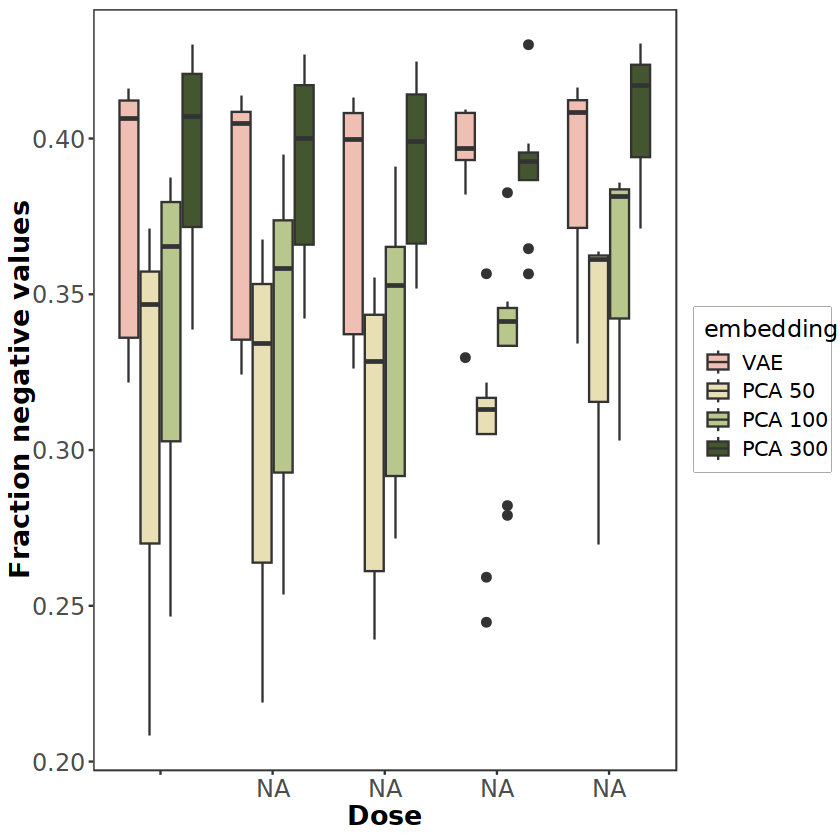

In [12]:
color_dict <- c("PCA 50"= "#e9dfb4", "PCA 100"= "#b8c88d", "PCA 300"="#44562f" , "VAE"= "#efbfb3")
df_ood$embedding <- factor(df_ood$embedding, levels = c("VAE", "PC_50", "PC_100", "PC_300"), labels = c("VAE", "PCA 50", "PCA 100", "PCA 300"))  # Correct factorization
df_ood$dose <- factor(df_ood$dose, levels = c(10, 100, 1000, 10000), labels = c("10", "100", "1000", "100000"))


p <- ggplot(df_ood, aes(x=dose, y=fraction_negative, fill=embedding)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Dose", y="Fraction negative values") +
  scale_fill_manual(values=color_dict) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
ggsave(file.path(fig_dir, "negativity.pdf"), plot = p, device = "pdf")
p